In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,d5ef0e51d2f7cc,6201db6524addd,0abd54baf538f9,0,1,186.0,0,0,0,43,...,0,0.0,0,0.0,0,0,74.32,2,0,0.2604
1,796c77b15772e8,2f4ba5d01e8b61,4a80eaf5b09cb1,0,4,353.8,2,1,7,4,...,1,1877.0,0,0.0,0,0,1732.00,4,0,0.7045
2,361fd477c3416d,5828bdb4d84060,510e6e0b2db210,0,0,0.0,0,0,1,65,...,0,0.0,0,0.0,0,0,75.47,1,1694,0.2692
3,3fc327f32d280f,1b9fc490905dd3,17cc47b32e11a1,0,0,0.0,0,0,0,85,...,0,0.0,0,0.0,0,0,153.50,2,0,0.1034
4,c26074655d0194,7c0636aeac7d3e,d321e78bae0840,0,0,119.7,2,0,0,18,...,0,0.0,0,0.0,0,0,194.20,4,0,0.1923


In [4]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,2.979467e+06,2.979467e+06,2.979467e+06,2.979467e+06,2.979467e+06,2.979467e+06,2.979467e+06,2.979467e+06,2.979467e+06,2.979467e+06,...,2.979467e+06,2.979467e+06,2.979467e+06,2.979467e+06,2.979467e+06,2.979467e+06,2.979467e+06,2.979467e+06,2.979467e+06,2.979466e+06
mean,2.338042e-01,1.107719e+00,1.307676e+02,6.580959e-01,2.270379e-01,1.371245e+00,4.758193e+01,5.050374e+02,9.255350e-01,5.443259e-01,...,1.648241e-01,6.066944e+02,3.475118e-03,4.512207e+00,2.383614e-02,7.916517e-03,1.154899e+03,3.660597e+00,6.064248e+02,4.729253e-01
std,5.881412e-01,1.716574e+00,1.708132e+02,1.145698e+00,6.024485e-01,2.680303e+00,2.746205e+01,6.275943e+02,1.559334e+00,7.109235e-01,...,4.727409e-01,1.498534e+03,7.268309e-02,3.046553e+01,1.674755e-01,9.271241e-02,1.183850e+03,2.456606e+00,7.397088e+02,3.074121e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.553000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.437000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.865000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,4.058000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.978000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,2.800000e+01,5.990000e+03,5.300000e+01,6.400000e+01,7.300000e+01,1.010000e+02,2.154000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.400000e+01,3.514000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.002000e+03,1.000000e+00


In [5]:
kmn=df["killPoints"].mean()
wmn=df["winPoints"].mean()

In [6]:
df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [7]:
df.drop(axis="rows",labels=df.index[df["winPlacePerc"].isna()],inplace=True)

In [8]:
df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [9]:
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,d5ef0e51d2f7cc,6201db6524addd,0abd54baf538f9,0,1,186.00,0,0,0,43,...,0,0.00,0,0.0,0,0,74.32,2,0,0.2604
1,796c77b15772e8,2f4ba5d01e8b61,4a80eaf5b09cb1,0,4,353.80,2,1,7,4,...,1,1877.00,0,0.0,0,0,1732.00,4,0,0.7045
2,361fd477c3416d,5828bdb4d84060,510e6e0b2db210,0,0,0.00,0,0,1,65,...,0,0.00,0,0.0,0,0,75.47,1,1694,0.2692
3,3fc327f32d280f,1b9fc490905dd3,17cc47b32e11a1,0,0,0.00,0,0,0,85,...,0,0.00,0,0.0,0,0,153.50,2,0,0.1034
4,c26074655d0194,7c0636aeac7d3e,d321e78bae0840,0,0,119.70,2,0,0,18,...,0,0.00,0,0.0,0,0,194.20,4,0,0.1923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979462,fb5c522cb1a9eb,f02bf0eeac85ea,86032b4e374c74,0,8,29.83,0,0,2,41,...,0,0.00,0,0.0,0,0,2052.00,5,0,0.9231
2979463,fab9d9a7726b60,115a85181a2a0b,84bf0c2075b8b7,0,1,0.00,0,0,4,61,...,0,86.49,0,0.0,0,0,1053.00,3,0,0.4211
2979464,6f609b3e78df51,9fc1a2628c980a,8e6aee43c09e08,0,0,0.00,0,0,0,84,...,0,0.00,0,0.0,0,0,0.00,0,0,0.0000
2979465,89604bf95ea5a2,1dbf697dad19e4,f2672978cc29d6,0,1,386.20,1,0,1,9,...,0,0.00,0,0.0,0,0,2026.00,6,0,0.7111


In [10]:
df.loc[df.rankPoints>-1]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,d5ef0e51d2f7cc,6201db6524addd,0abd54baf538f9,0,1,186.00,0,0,0,43,...,0,0.00,0,0.0,0,0,74.32,2,0,0.2604
1,796c77b15772e8,2f4ba5d01e8b61,4a80eaf5b09cb1,0,4,353.80,2,1,7,4,...,1,1877.00,0,0.0,0,0,1732.00,4,0,0.7045
3,3fc327f32d280f,1b9fc490905dd3,17cc47b32e11a1,0,0,0.00,0,0,0,85,...,0,0.00,0,0.0,0,0,153.50,2,0,0.1034
4,c26074655d0194,7c0636aeac7d3e,d321e78bae0840,0,0,119.70,2,0,0,18,...,0,0.00,0,0.0,0,0,194.20,4,0,0.1923
6,3428eb76d71157,fc63223ccda112,af119429bc890b,1,0,87.90,0,0,0,74,...,0,151.80,0,0.0,0,0,379.90,3,0,0.1852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979462,fb5c522cb1a9eb,f02bf0eeac85ea,86032b4e374c74,0,8,29.83,0,0,2,41,...,0,0.00,0,0.0,0,0,2052.00,5,0,0.9231
2979463,fab9d9a7726b60,115a85181a2a0b,84bf0c2075b8b7,0,1,0.00,0,0,4,61,...,0,86.49,0,0.0,0,0,1053.00,3,0,0.4211
2979464,6f609b3e78df51,9fc1a2628c980a,8e6aee43c09e08,0,0,0.00,0,0,0,84,...,0,0.00,0,0.0,0,0,0.00,0,0,0.0000
2979465,89604bf95ea5a2,1dbf697dad19e4,f2672978cc29d6,0,1,386.20,1,0,1,9,...,0,0.00,0,0.0,0,0,2026.00,6,0,0.7111


In [11]:
df.loc[((df["rankPoints"]!=-1) & (df["killPoints"]==0)),"killPoints"]=df["killPoints"].mean()
df.loc[((df["rankPoints"]!=-1) & (df["winPoints"]==0)),"winPoints"]=df["winPoints"].mean()

In [12]:
df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [13]:
testdf=df.drop(axis="columns",labels=["killPoints","winPoints"])

In [14]:
testdf.nunique()

Id                 2979466
groupId            1681662
matchId              47964
assists                 18
boosts                  25
damageDealt          28172
DBNOs                   37
headshotKills           30
heals                   59
killPlace              101
kills                   54
killStreaks             16
longestKill          27117
matchDuration         1266
matchType               16
maxPlace                99
numGroups              100
rankPoints            2075
revives                 24
rideDistance         30768
roadKills               13
swimDistance         26362
teamKills               11
vehicleDestroys          6
walkDistance         36933
weaponsAcquired         91
winPlacePerc          2923
dtype: int64

In [15]:
testdf["matchType"].unique()

array(['solo-fpp', 'duo', 'squad', 'squad-fpp', 'duo-fpp', 'solo',
       'normal-duo-fpp', 'normal-squad-fpp', 'crashfpp', 'flarefpp',
       'normal-solo-fpp', 'flaretpp', 'normal-duo', 'normal-squad',
       'normal-solo', 'crashtpp'], dtype=object)

In [16]:
lbl_encodr=LabelEncoder()
new_type=lbl_encodr.fit_transform(testdf["matchType"])
new_type

array([13,  2, 14, ..., 15,  2, 13])

In [17]:
df["matchType"]

0           solo-fpp
1                duo
2              squad
3          squad-fpp
4          squad-fpp
             ...    
2979462        squad
2979463         solo
2979464    squad-fpp
2979465          duo
2979466     solo-fpp
Name: matchType, Length: 2979466, dtype: object

In [18]:
testdf["matchType"]=new_type
testdf["matchType"].head()

0    13
1     2
2    14
3    15
4    15
Name: matchType, dtype: int64

In [19]:
new_type=lbl_encodr.fit_transform(testdf["groupId"])
new_type

array([ 645364,  311343,  580803, ..., 1050496,  195710, 1618330])

In [20]:
testdf["groupId"]=new_type
testdf.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
0,d5ef0e51d2f7cc,645364,0abd54baf538f9,0,1,186.0,0,0,0,43,...,1501,0,0.0,0,0.0,0,0,74.32,2,0.2604
1,796c77b15772e8,311343,4a80eaf5b09cb1,0,4,353.8,2,1,7,4,...,1444,1,1877.0,0,0.0,0,0,1732.00,4,0.7045
2,361fd477c3416d,580803,510e6e0b2db210,0,0,0.0,0,0,1,65,...,-1,0,0.0,0,0.0,0,0,75.47,1,0.2692
3,3fc327f32d280f,181474,17cc47b32e11a1,0,0,0.0,0,0,0,85,...,1500,0,0.0,0,0.0,0,0,153.50,2,0.1034
4,c26074655d0194,816158,d321e78bae0840,0,0,119.7,2,0,0,18,...,1492,0,0.0,0,0.0,0,0,194.20,4,0.1923


In [21]:
testdf.index[testdf.duplicated()]

Int64Index([], dtype='int64')

In [22]:
testdf.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'kills', 'killStreaks',
       'longestKill', 'matchDuration', 'matchType', 'maxPlace', 'numGroups',
       'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance',
       'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired',
       'winPlacePerc'],
      dtype='object')

In [23]:
testdfnum=testdf.drop(axis="columns",labels=["Id","groupId","matchId","killPlace","matchType"])

assists


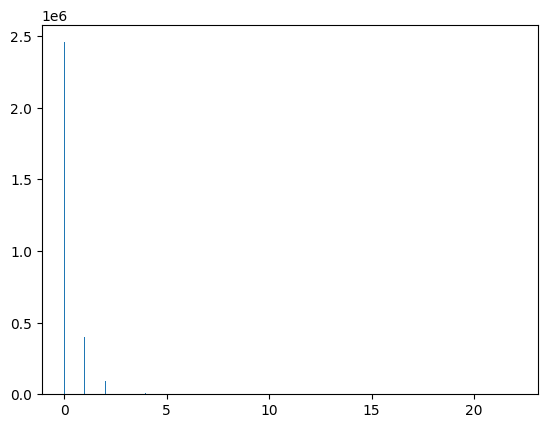

boosts


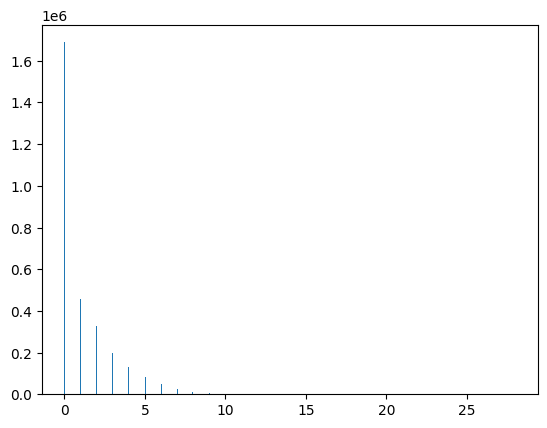

damageDealt


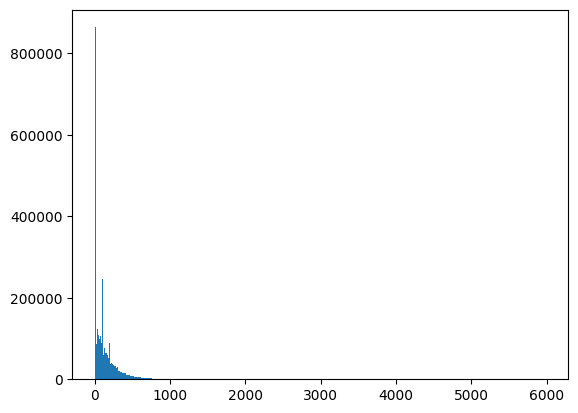

DBNOs


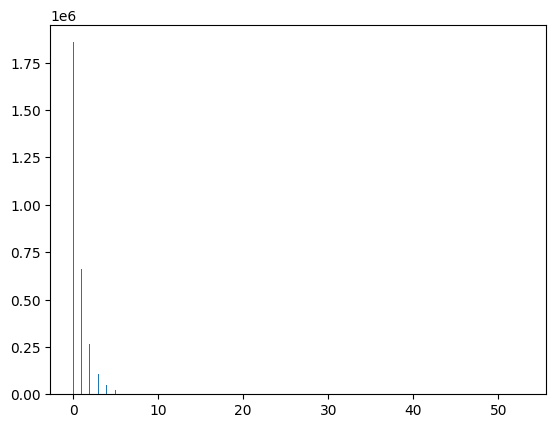

headshotKills


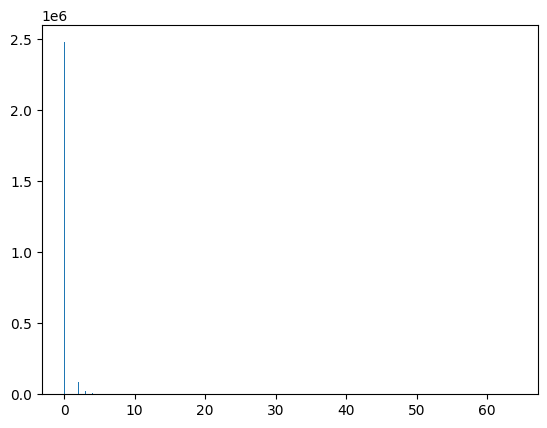

heals


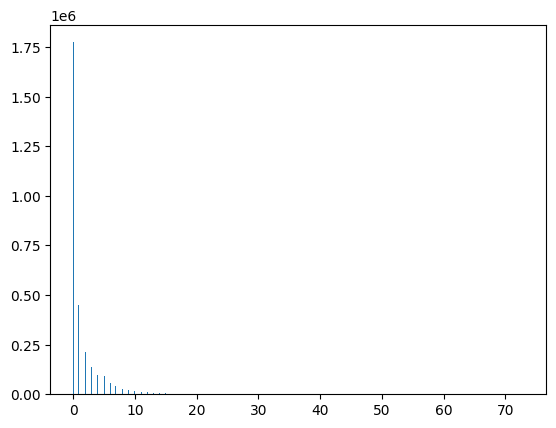

kills


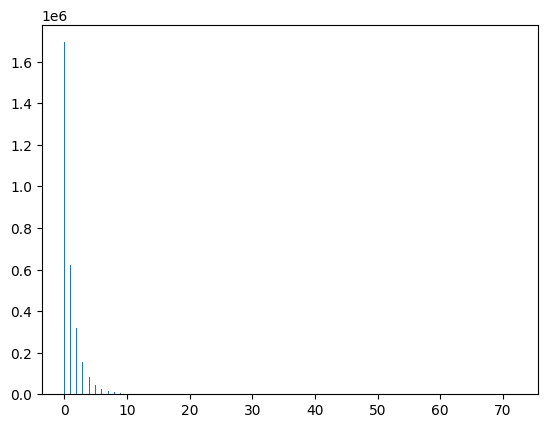

killStreaks


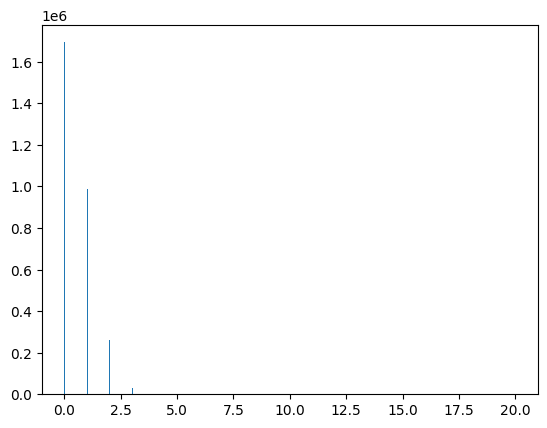

longestKill


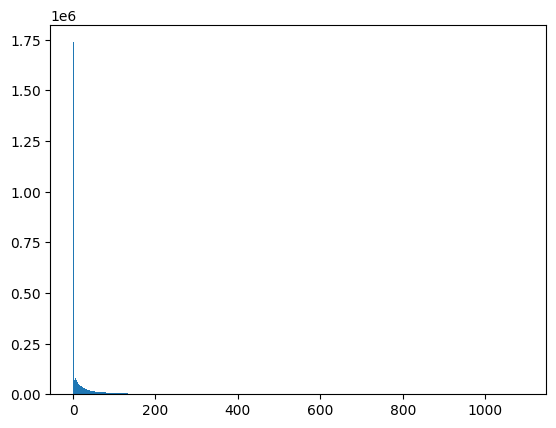

matchDuration


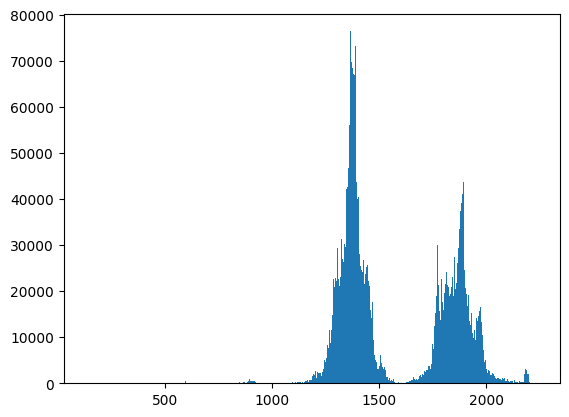

maxPlace


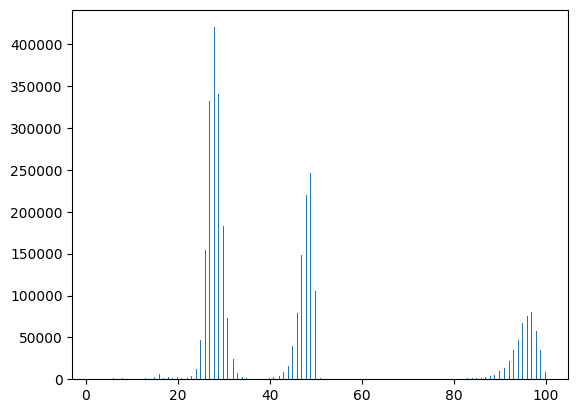

numGroups


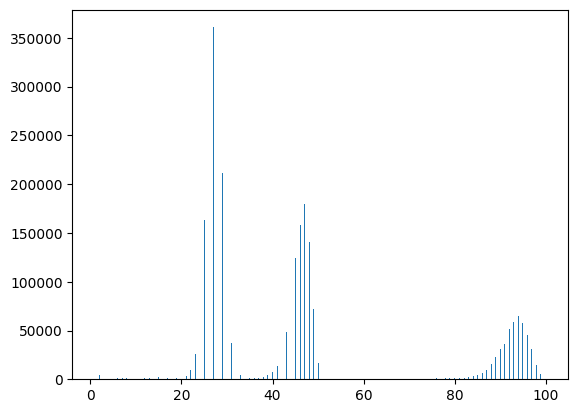

rankPoints


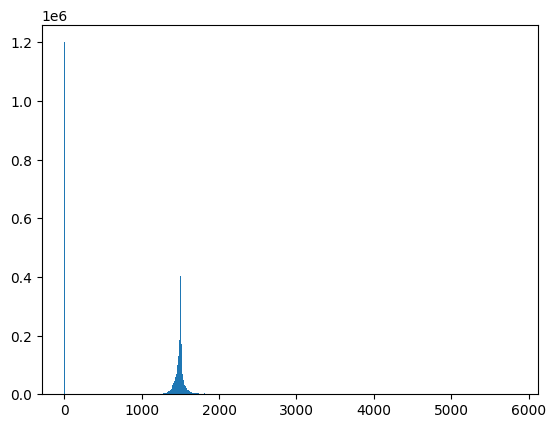

revives


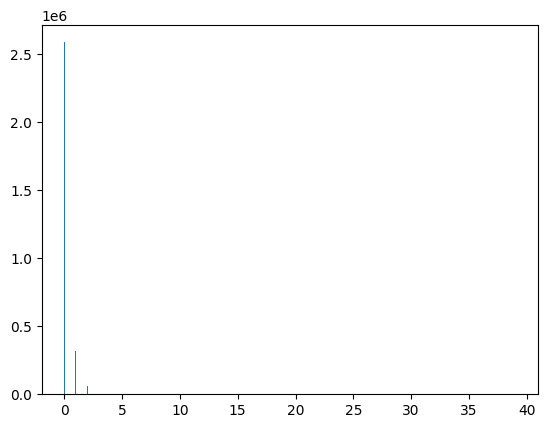

rideDistance


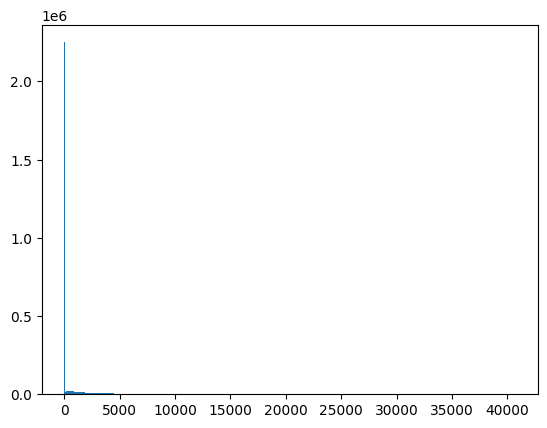

roadKills


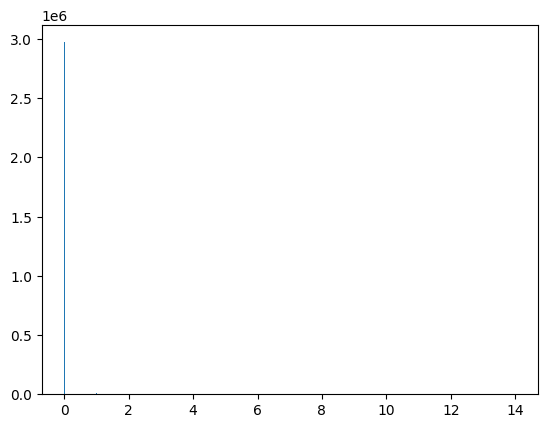

swimDistance


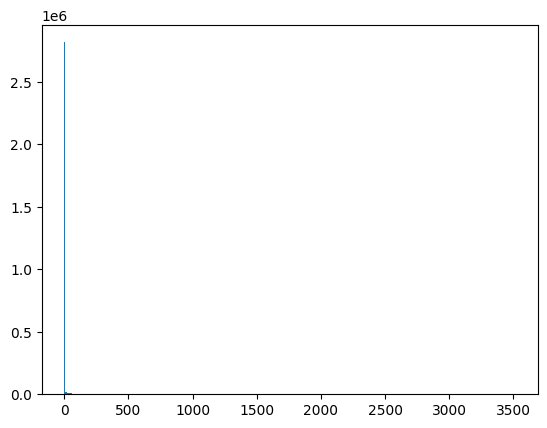

teamKills


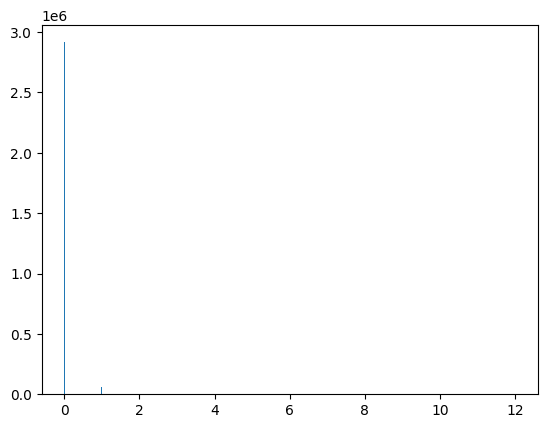

vehicleDestroys


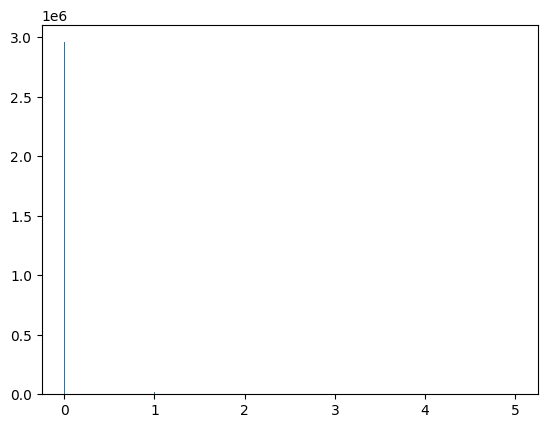

walkDistance


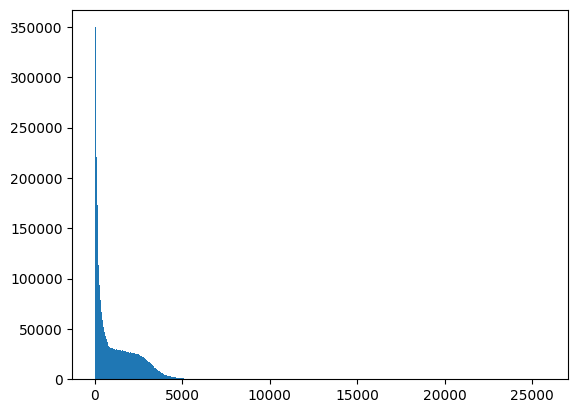

weaponsAcquired


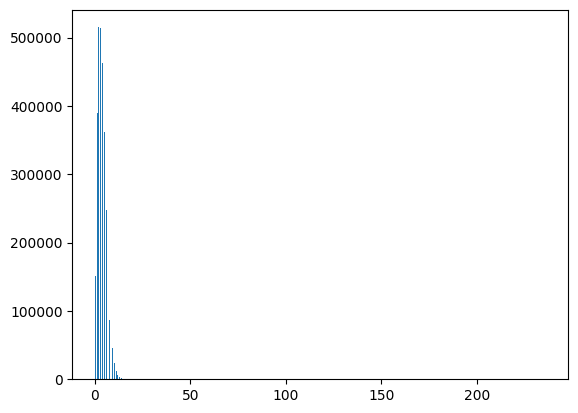

winPlacePerc


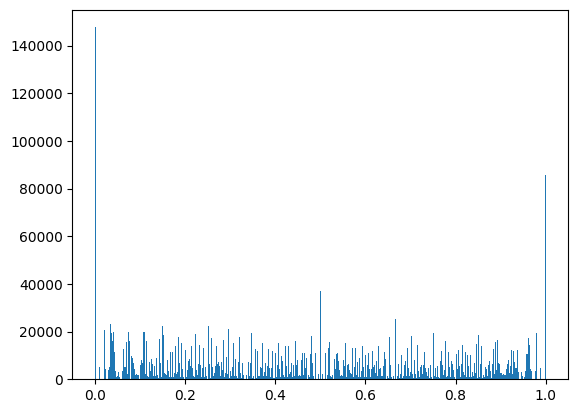

In [24]:
for i in testdfnum.columns:
    plt.hist(testdf[i],bins=500)
    print(i)
    plt.show()

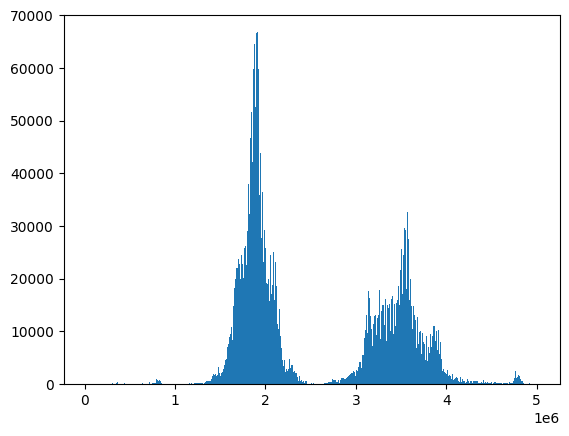

In [25]:
plt.hist(np.power(testdf["matchDuration"],2),bins=500)
plt.show()

assists


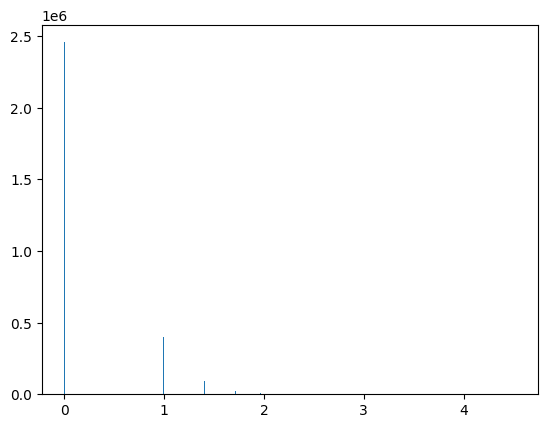

boosts


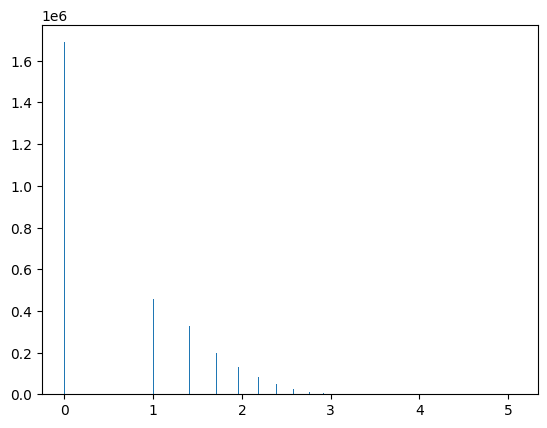

damageDealt


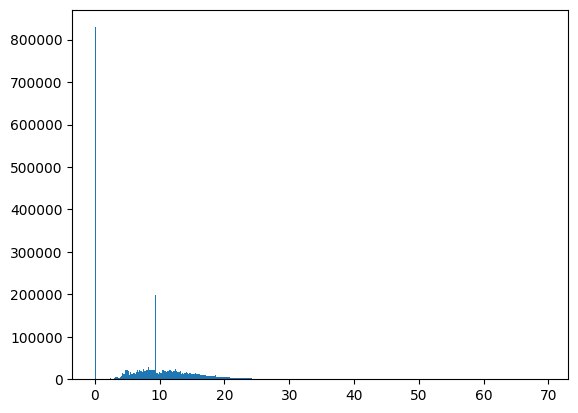

DBNOs


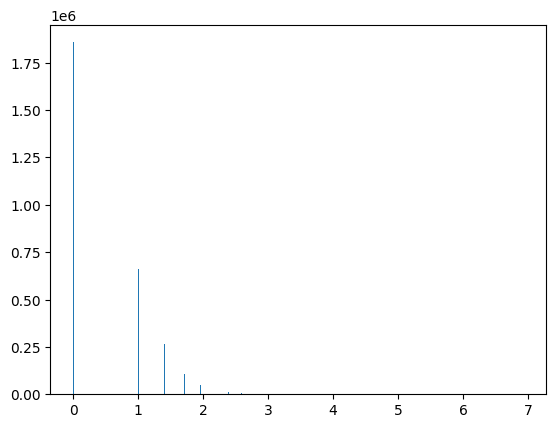

headshotKills


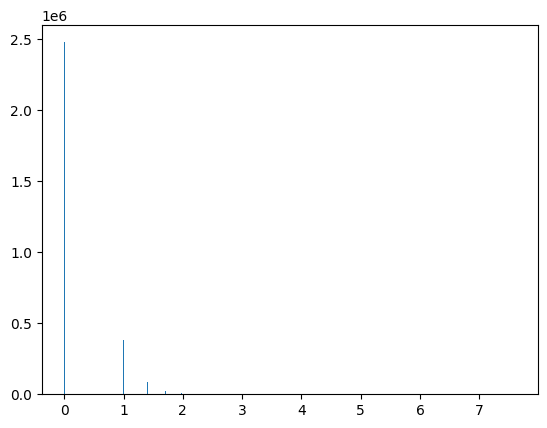

heals


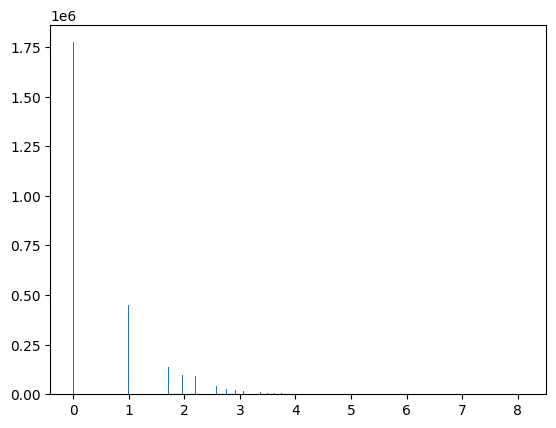

kills


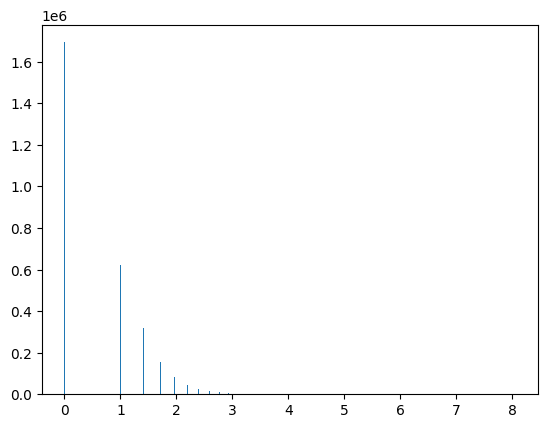

killStreaks


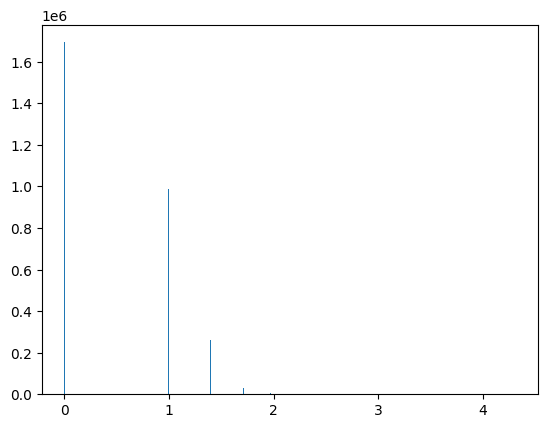

longestKill


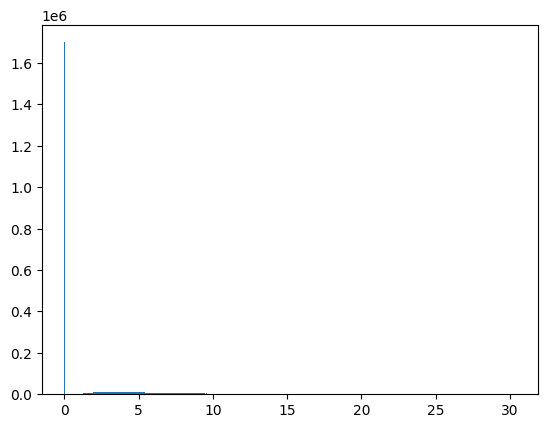

maxPlace


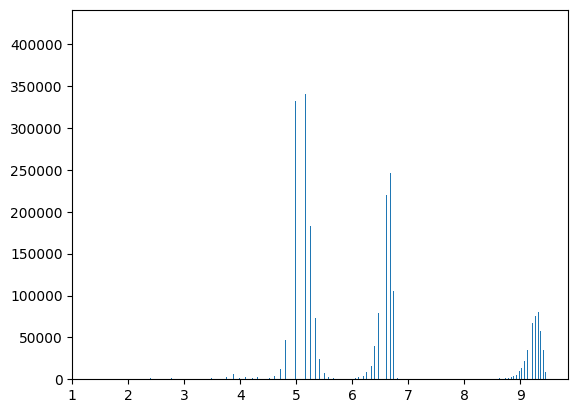

numGroups


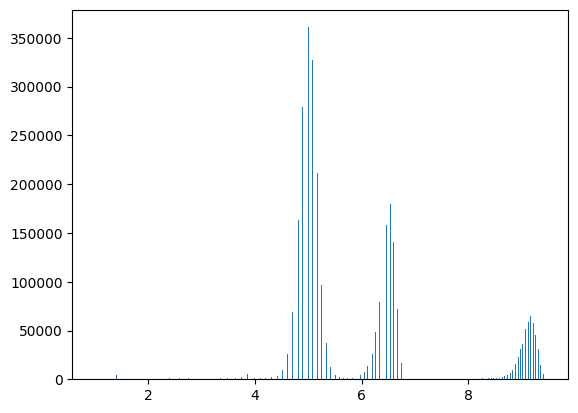

rankPoints


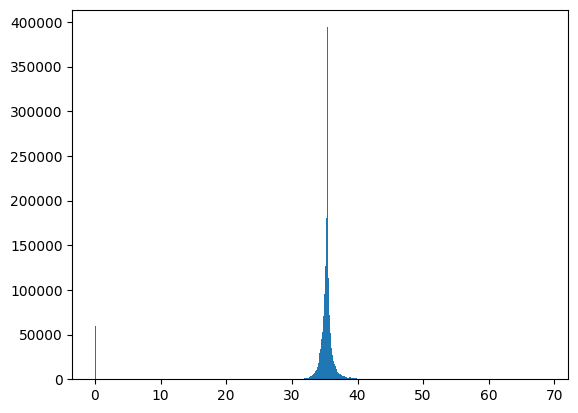

revives


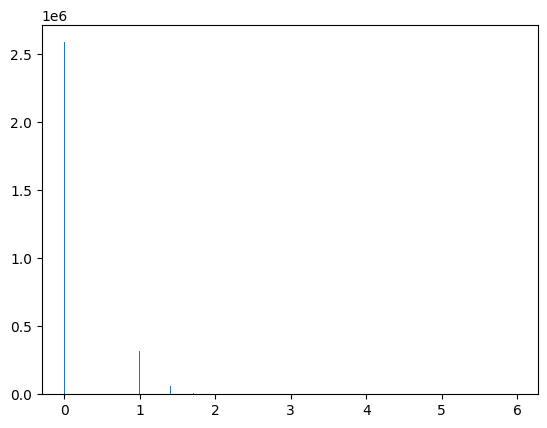

rideDistance


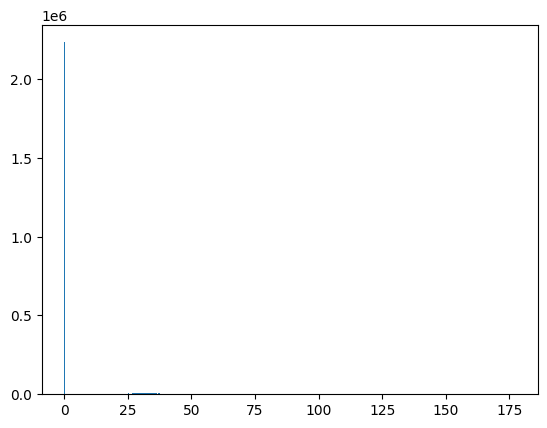

roadKills


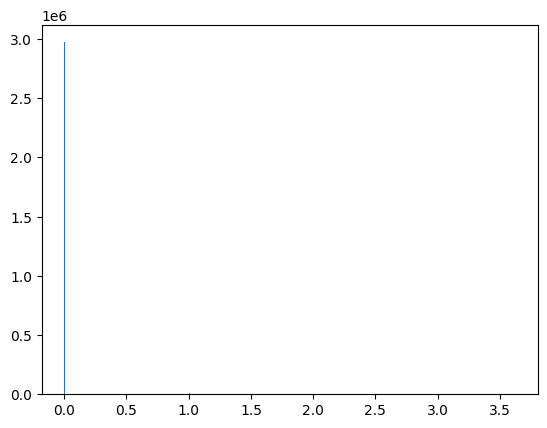

swimDistance


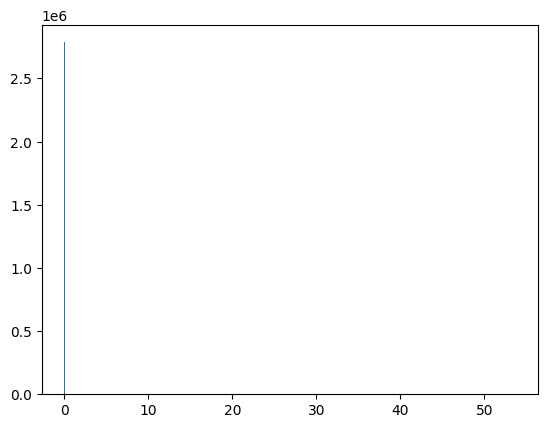

teamKills


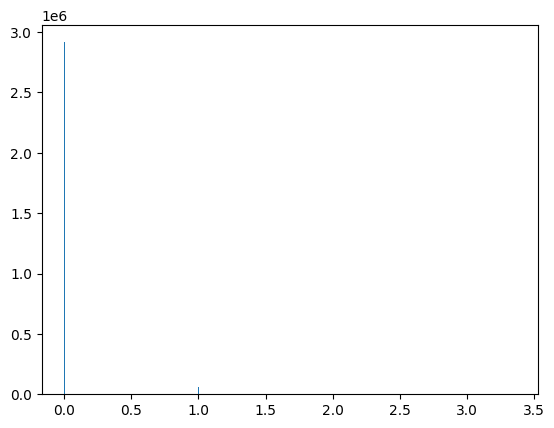

vehicleDestroys


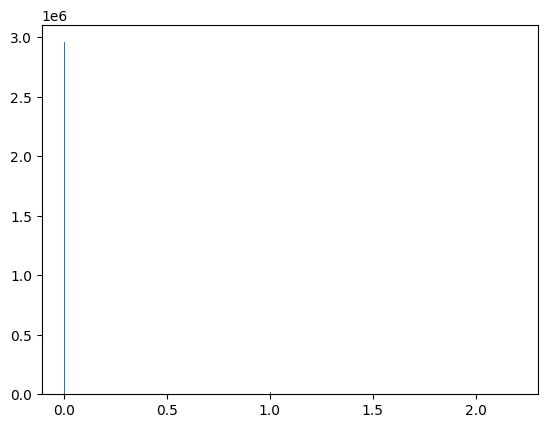

walkDistance


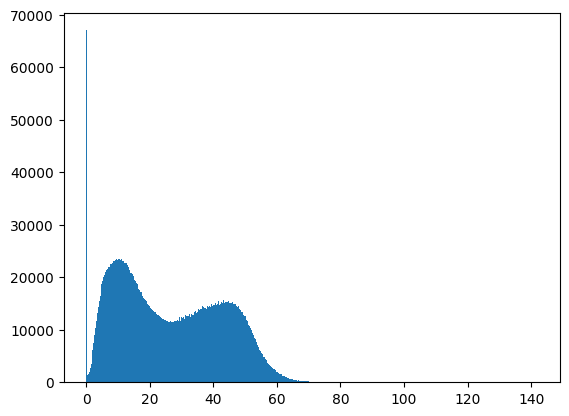

weaponsAcquired


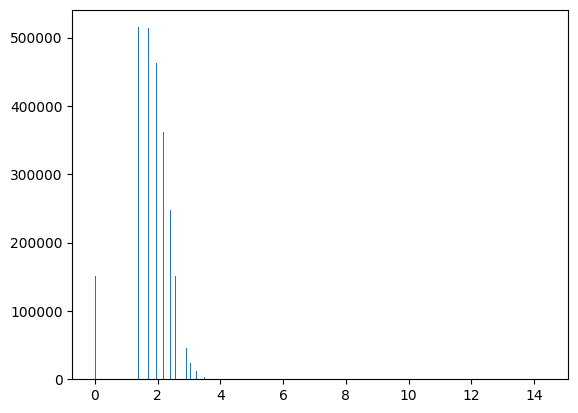

In [26]:
testdf_cont=testdfnum.drop(axis="columns",labels=["matchDuration","winPlacePerc"])
for i in testdf_cont.columns:
    plt.hist(np.power(testdf_cont[i],1/2.05),bins=500)
    print(i)
    plt.show()
    testdf[i]=np.power(testdf_cont[i],1/2.05)

In [27]:
testdf_new=pd.DataFrame()
testdf_new["damageDealt"]=testdf["damageDealt"]
testdf_new["walkDistance"]=testdf["walkDistance"]
testdf_new["weaponsAcquired"]=testdf["weaponsAcquired"]

In [28]:
testdf_new

,damageDealt,walkDistance,weaponsAcquired
0,12.796155,8.179646,1.402310
1,17.510418,37.999638,1.966472
2,0.000000,8.241144,1.000000
3,0.000000,11.651835,1.402310
4,10.320589,13.068301,1.966472
...,...,...,...
2979462,5.240142,41.275873,2.192608
2979463,0.000000,29.809542,1.709000
2979464,0.000000,0.000000,0.000000
2979465,18.275095,41.019924,2.396547


damageDealt


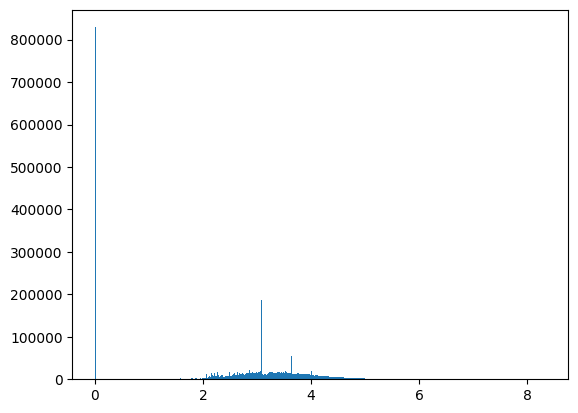

walkDistance


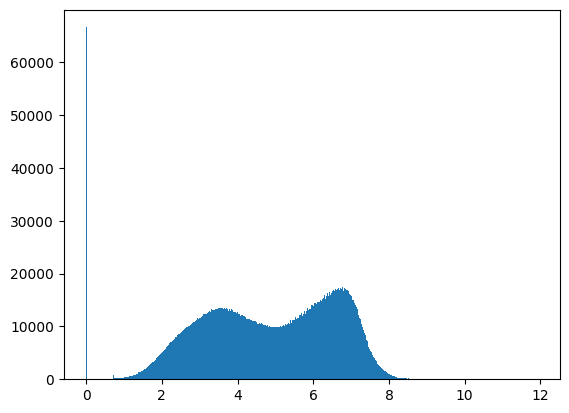

weaponsAcquired


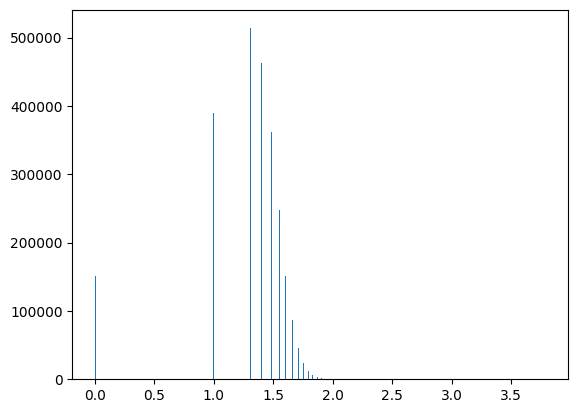

In [29]:
for i in testdf_new.columns:
    plt.hist(np.power(testdf_new[i],1/2),bins=500)
    print(i)
    plt.show()
    testdf[i]=np.power(testdf_new[i],1/2)

In [30]:
testdf["matchDuration"]=np.power(testdf["matchDuration"],2)

for i in testdf_cont.columns:
    testdf[i]=testdf_cont[i]

for i in testdf_new.columns:
    testdf[i]=testdf_new[i]

testdf

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
0,d5ef0e51d2f7cc,645364,0abd54baf538f9,0,1,12.796155,0,0,0,43,...,1501,0,0.00,0,0.0,0,0,8.179646,1.402310,0.2604
1,796c77b15772e8,311343,4a80eaf5b09cb1,0,4,17.510418,2,1,7,4,...,1444,1,1877.00,0,0.0,0,0,37.999638,1.966472,0.7045
2,361fd477c3416d,580803,510e6e0b2db210,0,0,0.000000,0,0,1,65,...,-1,0,0.00,0,0.0,0,0,8.241144,1.000000,0.2692
3,3fc327f32d280f,181474,17cc47b32e11a1,0,0,0.000000,0,0,0,85,...,1500,0,0.00,0,0.0,0,0,11.651835,1.402310,0.1034
4,c26074655d0194,816158,d321e78bae0840,0,0,10.320589,2,0,0,18,...,1492,0,0.00,0,0.0,0,0,13.068301,1.966472,0.1923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979462,fb5c522cb1a9eb,1577648,86032b4e374c74,0,8,5.240142,0,0,2,41,...,1510,0,0.00,0,0.0,0,0,41.275873,2.192608,0.9231
2979463,fab9d9a7726b60,114277,84bf0c2075b8b7,0,1,0.000000,0,0,4,61,...,1510,0,86.49,0,0.0,0,0,29.809542,1.709000,0.4211
2979464,6f609b3e78df51,1050496,8e6aee43c09e08,0,0,0.000000,0,0,0,84,...,1484,0,0.00,0,0.0,0,0,0.000000,0.000000,0.0000
2979465,89604bf95ea5a2,195710,f2672978cc29d6,0,1,18.275095,1,0,1,9,...,1483,0,0.00,0,0.0,0,0,41.019924,2.396547,0.7111


In [31]:
class Normalizer():
    def __init__(self,min_el,max_el):
        self.max_el=max_el
        self.min_el=min_el

    def scale(self,x):
        return (x - self.min_el)/(self.max_el-self.min_el)

In [32]:
class OutlierRemoval:
    def __init__(self, lq, uq):
        self.lw = lq - 1.5*(uq-lq)
        self.uw = uq - 1.5*(uq-lq)
    def removeOutlier(self,x):
        return (x if x <= self.uw and x>= self.lw else (self.lw if x < self.lw else self.uw))

assists


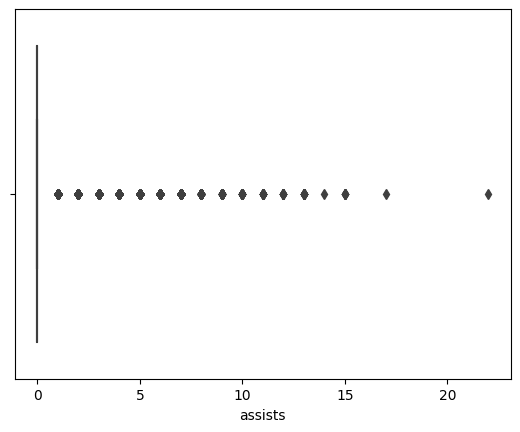

boosts


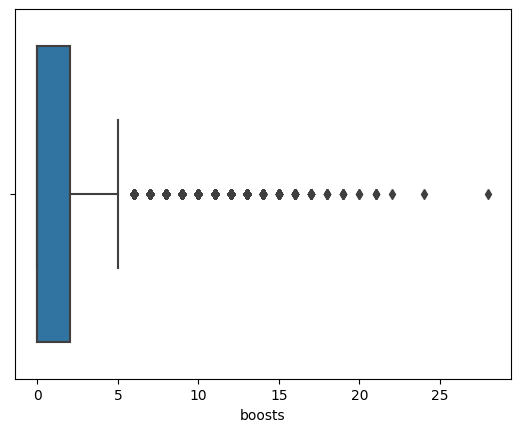

damageDealt


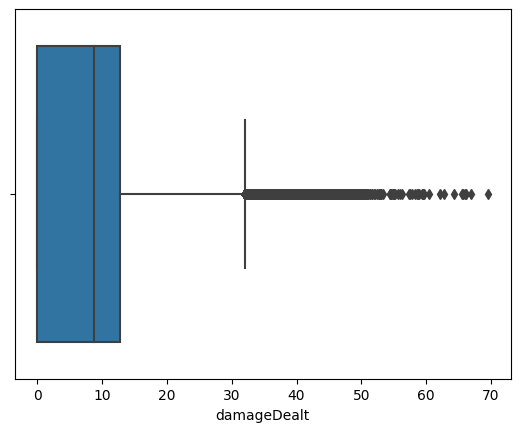

DBNOs


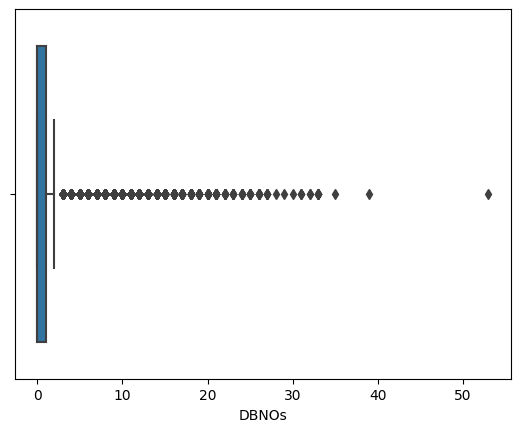

headshotKills


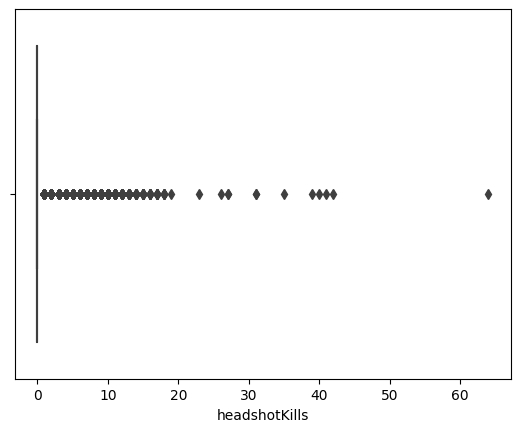

heals


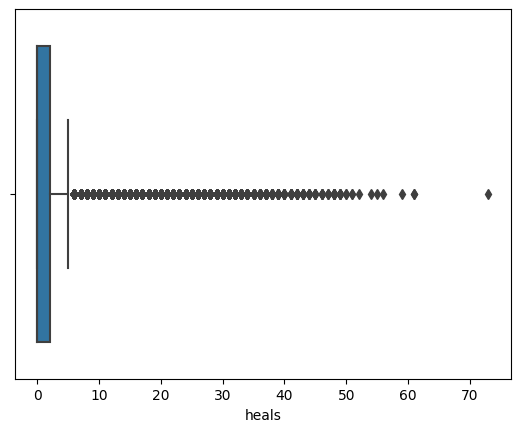

kills


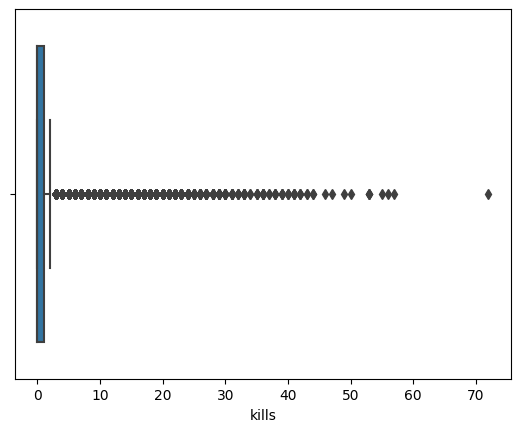

killStreaks


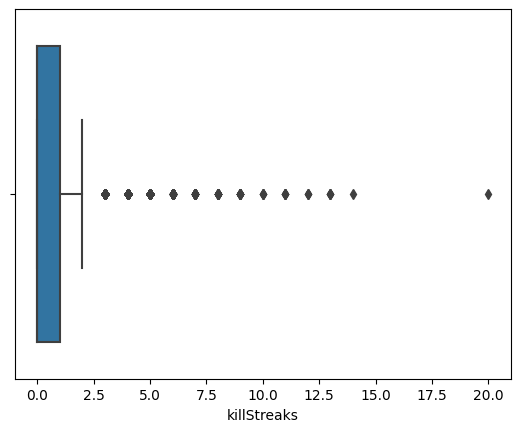

longestKill


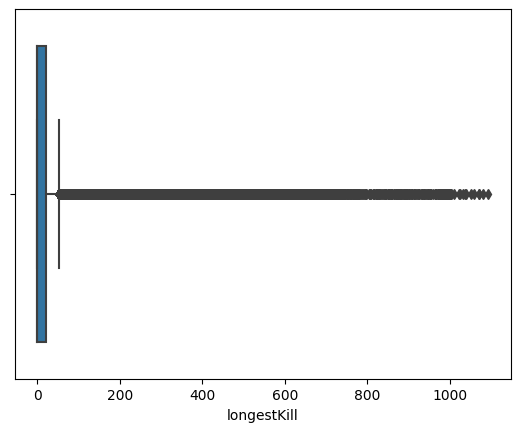

matchDuration


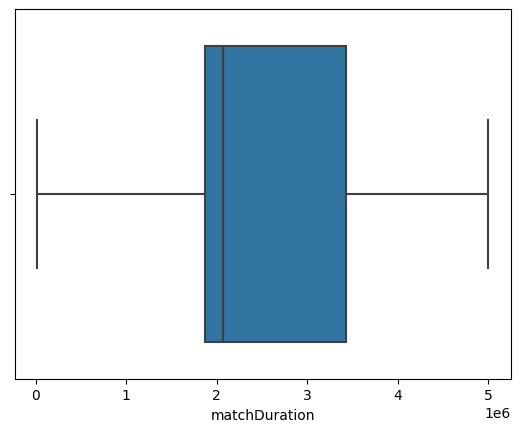

maxPlace


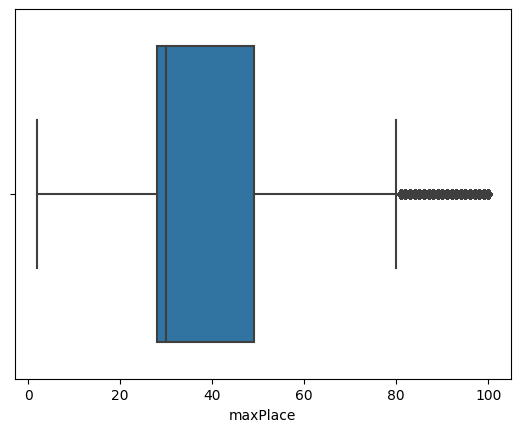

numGroups


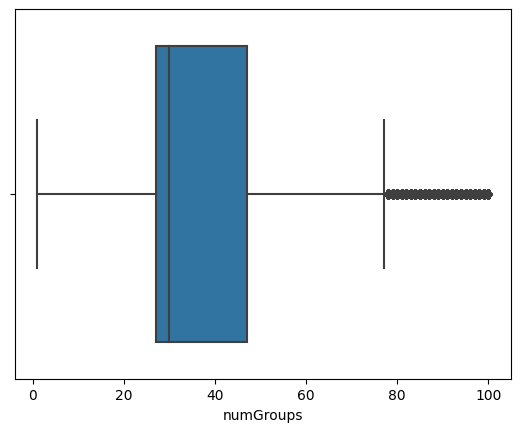

rankPoints


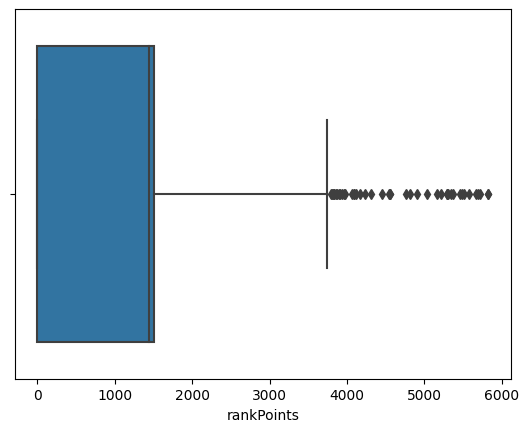

revives


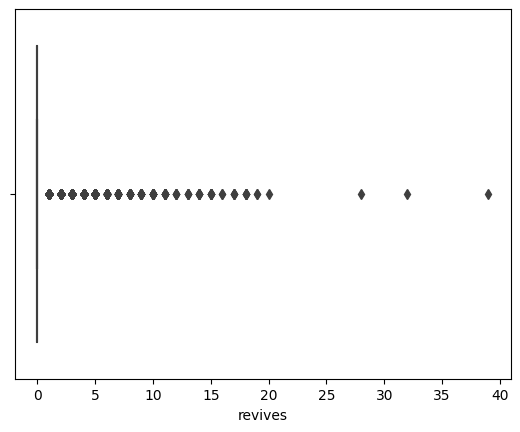

rideDistance


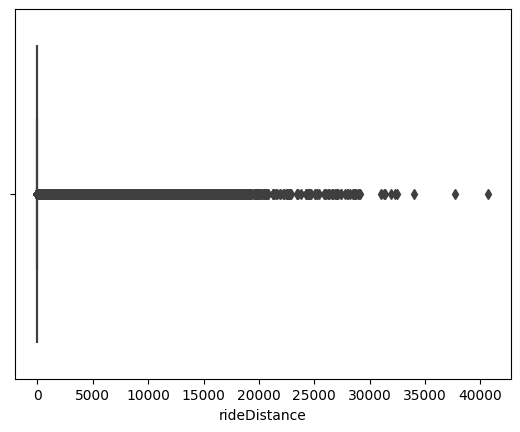

roadKills


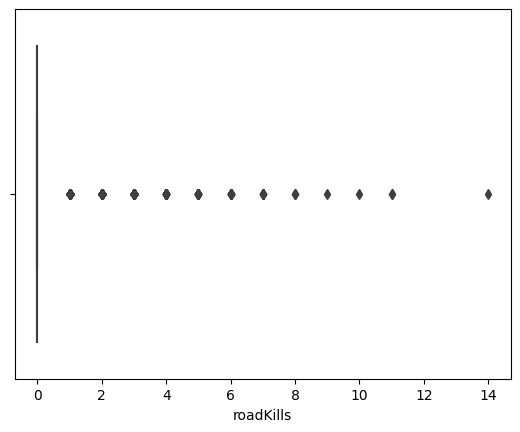

swimDistance


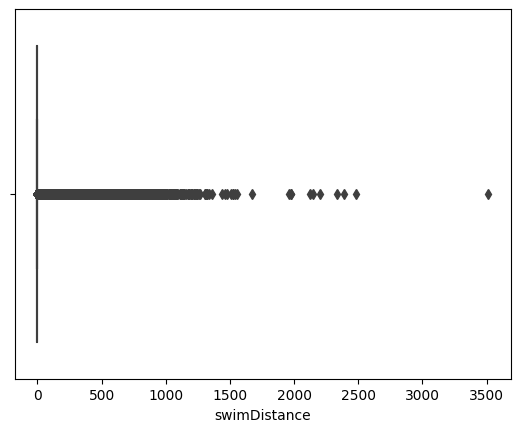

teamKills


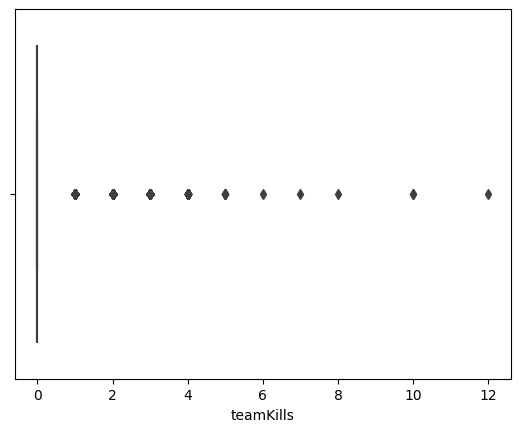

vehicleDestroys


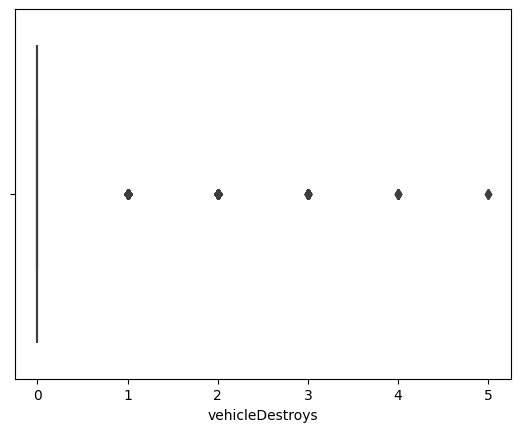

walkDistance


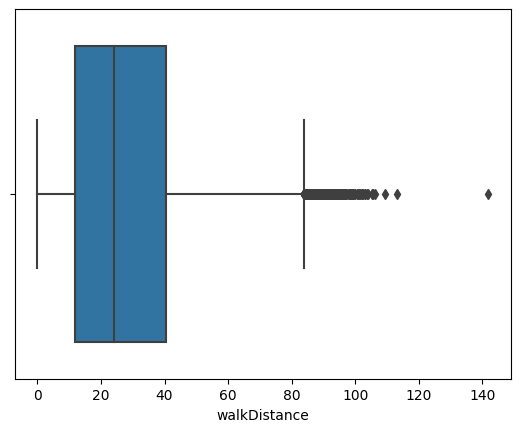

weaponsAcquired


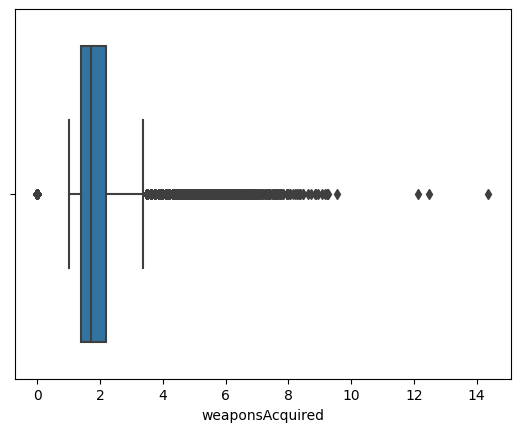

winPlacePerc


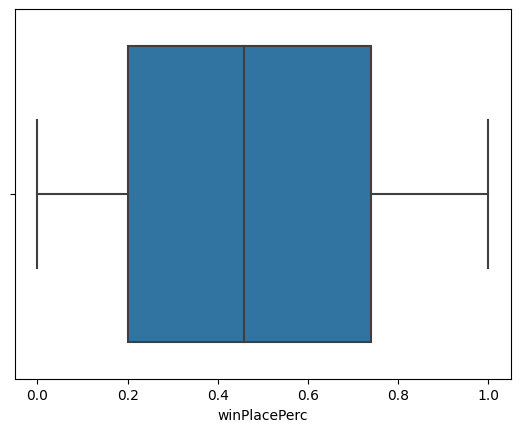

In [33]:
for i in testdfnum.columns:
    sns.boxplot(x=testdf[i])
    print(i)
    plt.show()

In [34]:
newplace=

SyntaxError: invalid syntax (2744329345.py, line 1)

In [ ]:
for i in testdf_cont.columns:
    normcol=testdf[i]
    scaler=Normalizer(normcol.min(),normcol.max())
    scaledcol=normcol.apply(scaler.scale)
    print(i)
    sns.displot(scaledcol,kde=True)
    plt.show()
    testdf[i]=scaledcol    

KeyboardInterrupt: 